In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.preprocessing import FunctionTransformer

In [18]:
from sklearn.compose import ColumnTransformer

## 1st We remove exter column

In [19]:
df=pd.read_csv('train.csv')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [23]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Khalid\AppData\Local\Temp\ipykernel_13804\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


#### Now we Store Input Cols in X and Output Col in Y

In [49]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [50]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [51]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [52]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Train Test Split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [55]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

## Now we Check Our data is Normal or not 
## Age Column

#### PDF

Text(0.5, 1.0, 'PDF')

<Figure size 1400x400 with 0 Axes>

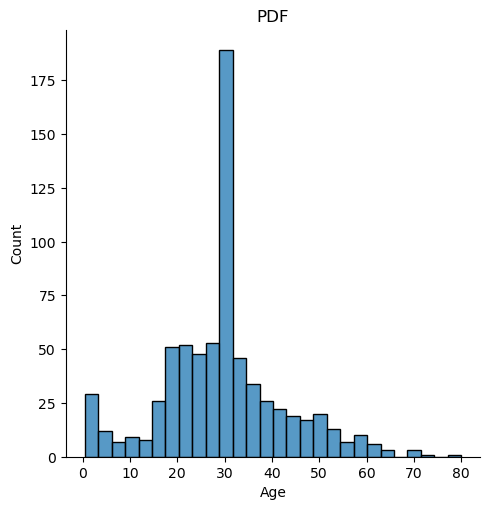

In [56]:
plt.figure(figsize=(14,4))

sns.displot(x_train['Age'])
plt.title('PDF')

### QQPlot

In [57]:
import scipy.stats as stats

Text(0.5, 1.0, 'QQplot')

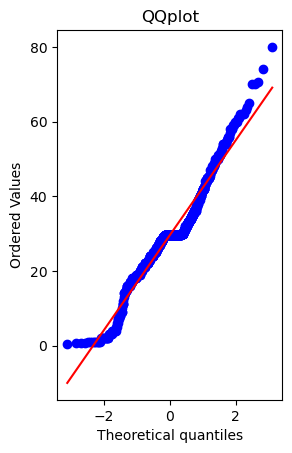

In [58]:
plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQplot')

## Now Check Fare Column

Text(0.5, 1.0, 'QQPlot Fare')

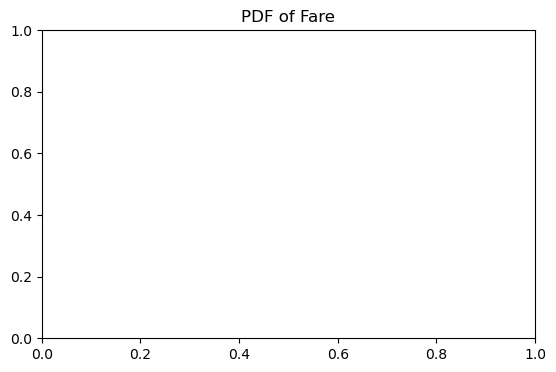

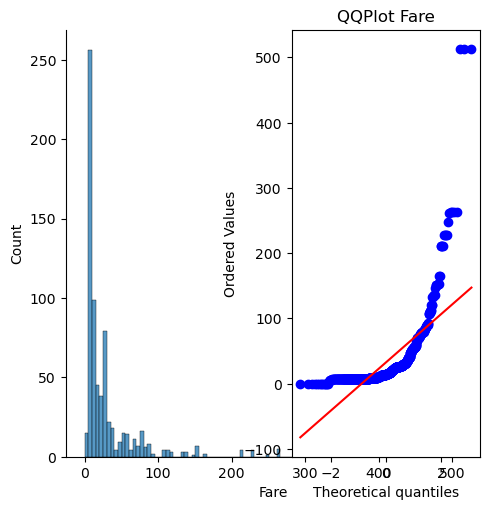

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('PDF of Fare')
sns.displot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('QQPlot Fare')

## Before Transformer Check the Accuracy 

In [65]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [68]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)

In [70]:
print('Accuracy of LR = ',accuracy_score(y_test,y_pred))
print('Accuracy of DT = ', accuracy_score(y_test,y_pred2))

Accuracy of LR =  0.6480446927374302
Accuracy of DT =  0.6815642458100558


# Now start Function Transformer
### 1.Log transform
### 2.Reciprocal transform
### 3. Sq and Sq Root

# 1. Log transform

In [93]:
trf=FunctionTransformer(func=np.log1p)

In [94]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

### again check the accuracy

In [95]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [96]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [97]:
y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)


In [99]:
print('Accuracy of LR = ',accuracy_score(y_test,y_pred))
print('Accuracy of DT = ', accuracy_score(y_test,y_pred2))

Accuracy of LR =  0.6815642458100558
Accuracy of DT =  0.6759776536312849


### Look Accuracy is incrase so now we Cross val 

In [101]:
x_transformed=trf.fit_transform(x)

In [103]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [107]:
print('LR = ',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT = ',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR =  0.678027465667915
DT =  0.6655805243445693


## Now check in Graph

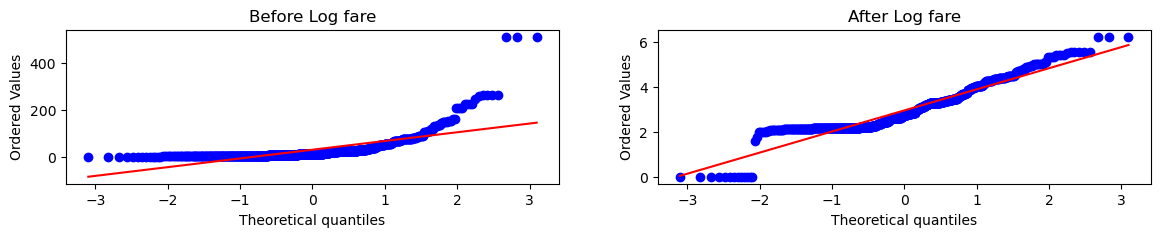

In [116]:
plt.figure(figsize=(14,2))
plt.subplot(121)

stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Before Log fare')

plt.subplot(122)

stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('After Log fare')
plt.show()

### Now Chech age cloumn

Text(0.5, 1.0, 'After Log Age ')

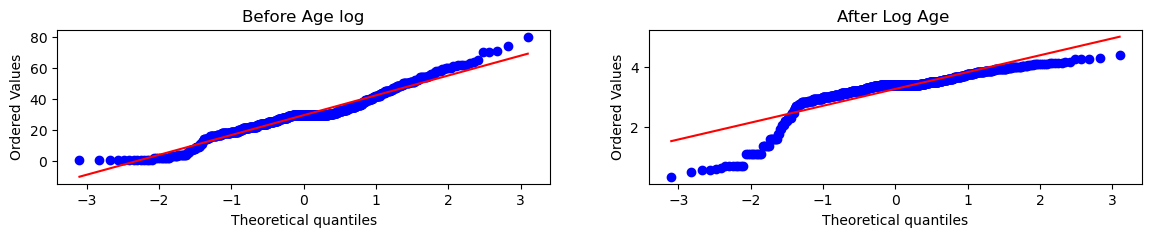

In [117]:
plt.figure(figsize=(14,2))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Before Age log')


plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('After Log Age ')

# Create A Function for this all code

In [131]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf=ColumnTransformer([
    ('log',FunctionTransformer(transform),['Fare'])
    ],remainder='passthrough')

    x_trains=trf.fit_transform(x)

    cif=LogisticRegression()
    print('Accuracy LR = ',np.mean(cross_val_score(clf,x_trains,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,2))

    plt.subplot(121)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('before Log Fare')

    plt.subplot(122)
    stats.probplot(x_trains[:,0],dist='norm',plot=plt)
    plt.title('After Log Fare')
    plt.show()



Accuracy LR =  0.6589013732833957


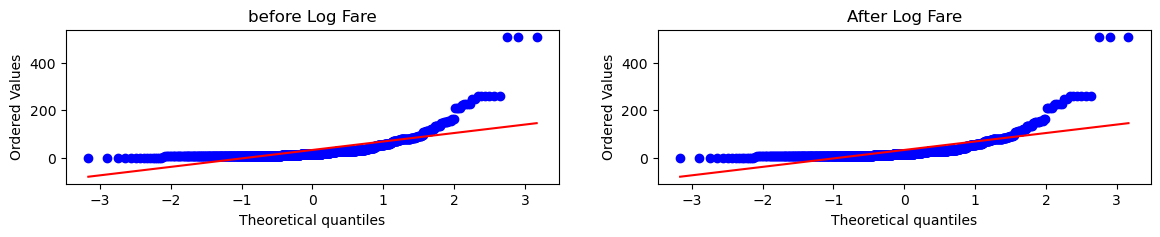

In [135]:
apply_transform(lambda x:x)

# 2.Reciprocal Transform

Accuracy LR =  0.61729088639201


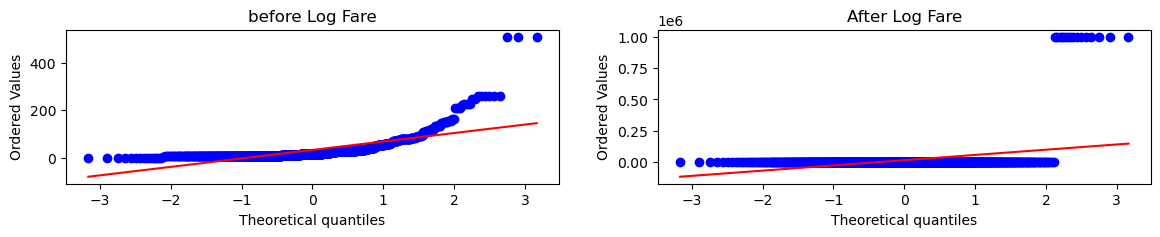

In [134]:
apply_transform(lambda x:1/(x+0.000001))

# 3.1 Squre 

Accuracy LR =  0.6431335830212235


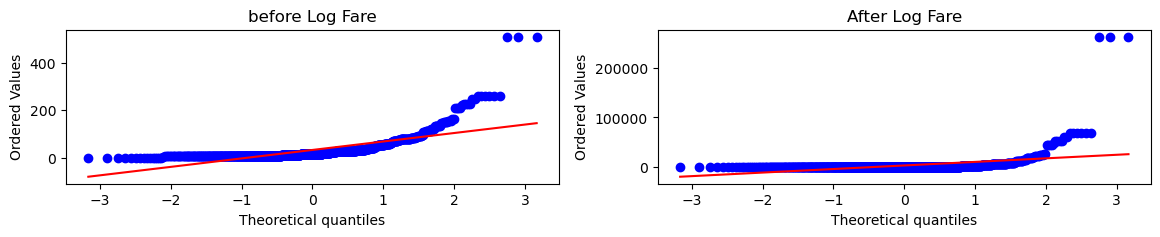

In [136]:
apply_transform(lambda x : x**2)

# 3.1 Squre Root

Accuracy LR =  0.61729088639201


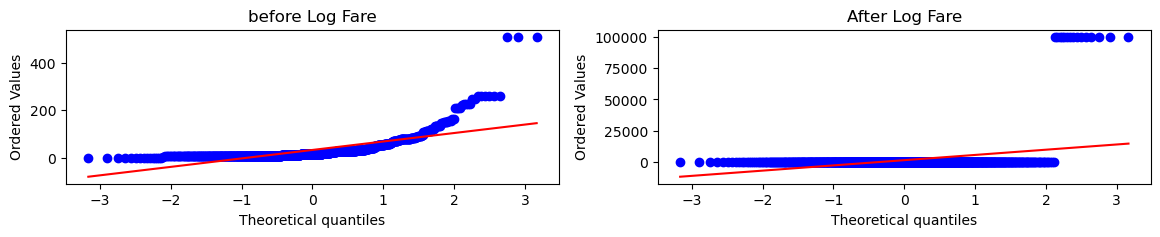

In [137]:
apply_transform(lambda x : 1/(x+0.00001))